# Length

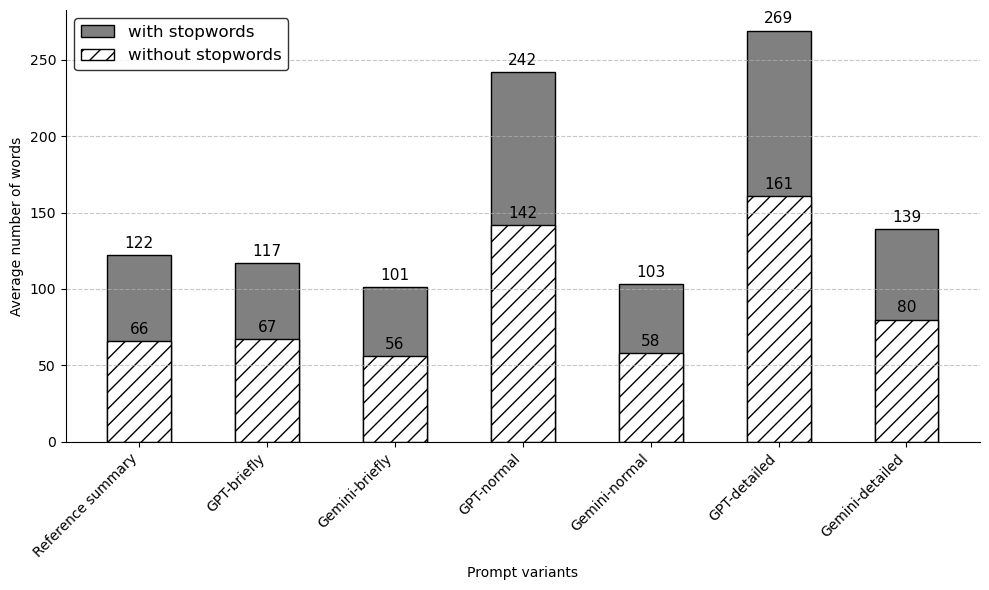

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Daten
categories = [
    "Reference summary",
    "GPT-briefly",
    "Gemini-briefly",
    "GPT-normal",
    "Gemini-normal",
    "GPT-detailed",
    "Gemini-detailed"
]

with_stopwords = [122, 117, 101, 242, 103, 269, 139]
without_stopwords = [66, 67, 56, 142, 58, 161, 80]

# Anpassung der x-Positionen für engere Gruppierung
group_spacing = 0.3  # Abstand zwischen den Gruppen
bar_spacing = 0    # Abstand innerhalb einer Gruppe

x = np.array([i * group_spacing for i in range(len(categories))])  # Positionen für Gruppen
width = 0.15  # Schmalere Balkenbreite

# Plot erstellen
fig, ax = plt.subplots(figsize=(10, 6))  # Kleineres Diagramm

# Balken für "mit Stopwords" (grau)
bars1 = ax.bar(
    x - bar_spacing / 2,
    with_stopwords,
    width,
    label="with stopwords",
    color="grey",
    edgecolor="black"
)

# Balken für "ohne Stopwords" (weiß mit Schraffur)
bars2 = ax.bar(
    x + bar_spacing / 2,
    without_stopwords,
    width,
    label="without stopwords",
    color="white",
    edgecolor="black",
    hatch="//"
)

# Beschriftungen und Titel
ax.set_xlabel("Prompt variants", fontsize=10)
ax.set_ylabel("Average number of words", fontsize=10)
#ax.set_title("Average number of words in summaries with and without stopwords", fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=45, ha="right", fontsize=10)

# Legende oben links platzieren und Schriftgröße anpassen
ax.legend(fontsize=12, loc="upper left",frameon=True, edgecolor="black")  # Größere Schrift und oben links positioniert

# Werte über den Balken anzeigen (fett und größer)
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(
            f"{int(height)}",
            xy=(bar.get_x() + bar.get_width() / 2, height),
            xytext=(0, 3),
            textcoords="offset points",
            ha="center",
            va="bottom",
            fontsize=11,  # Kleinere Schriftgröße
        )

# Wissenschaftliches Aussehen verbessern
ax.grid(axis="y", linestyle="--", alpha=0.7)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()
plt.show()

# ROUGE ChatGPT

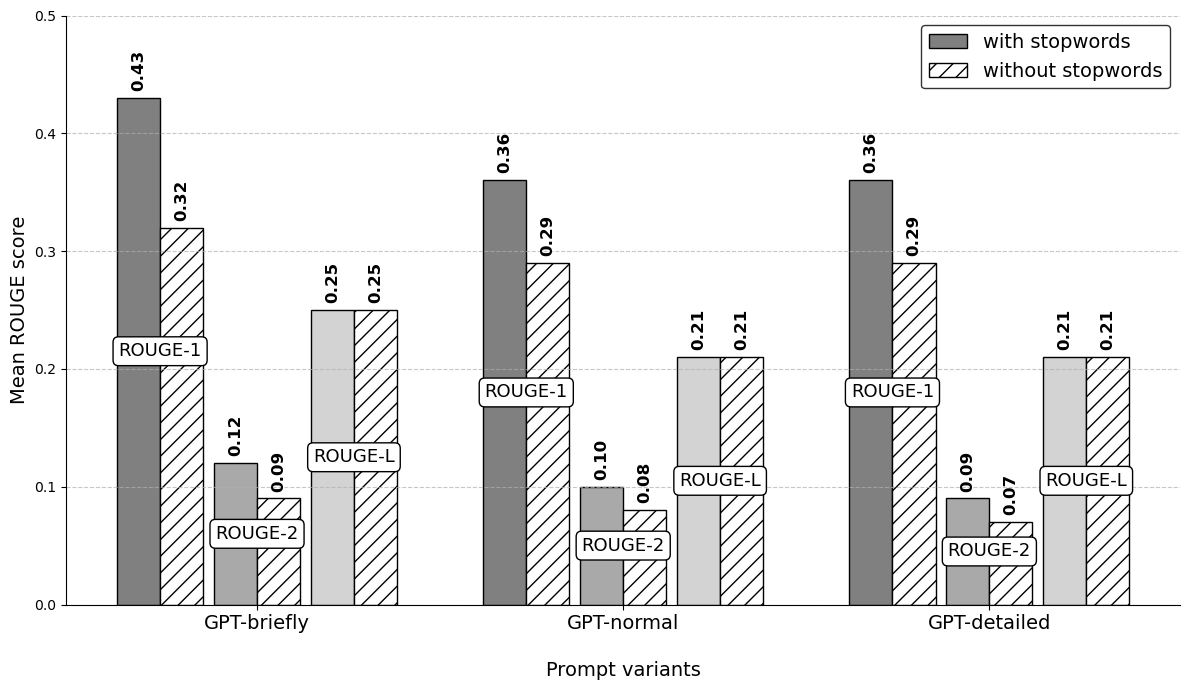

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Daten (korrekt mit vertauschten Werten)
with_stopwords = [
    [0.43, 0.12, 0.25],  # 4o-briefly
    [0.36, 0.10, 0.21],  # 4o-normal
    [0.36, 0.09, 0.21],  # 4o-detailed
]
without_stopwords = [
    [0.32, 0.09, 0.25],  # 4o-briefly
    [0.29, 0.08, 0.21],  # 4o-normal
    [0.29, 0.07, 0.21],  # 4o-detailed
]

prompts = ["GPT-briefly", "GPT-normal", "GPT-detailed"]  # Prompt-Varianten
metrics = ["ROUGE-1", "ROUGE-2", "ROUGE-L"]  # ROUGE-Kategorien

# Parameter für die Balken
width = 0.2  # Breite der Balken
spacing_within_prompt = 0.25  # Abstand zwischen ROUGE-1, ROUGE-2 und ROUGE-L
spacing_between_prompts = 0.6  # Abstand zwischen den Prompt-Gruppen

# X-Positionen berechnen
positions = []
current_position = 0
for _ in prompts:
    for _ in metrics:
        positions.append(current_position)
        current_position += spacing_within_prompt + width
    current_position += spacing_between_prompts - spacing_within_prompt

# Plot erstellen
fig, ax = plt.subplots(figsize=(12, 7))

# Farben für die Balken
colors = ["grey", "darkgrey", "lightgrey"]

# Balken für jede Metrik hinzufügen
for i, metric in enumerate(metrics):
    # Mit Stopwords
    ax.bar(
        [positions[j * len(metrics) + i] for j in range(len(prompts))],
        [row[i] for row in with_stopwords],
        width,
        label="with stopwords" if i == 0 else None,
        color=colors[i],
        edgecolor="black",
    )
    # Ohne Stopwords
    ax.bar(
        [positions[j * len(metrics) + i] + width for j in range(len(prompts))],
        [row[i] for row in without_stopwords],
        width,
        label="without stopwords" if i == 0 else None,
        color="white",
        edgecolor="black",
        hatch="//",
    )

    # Text in der Mitte der Balkenpaare (weiße Box mit Text)
    for j, prompt in enumerate(prompts):
        # X-Position in der Mitte zwischen den Balken
        mid_x = (positions[j * len(metrics) + i] + (positions[j * len(metrics) + i] + width)) / 2
        # Y-Position etwas über den kleineren der beiden Balken
        mid_y = max(with_stopwords[j][i], without_stopwords[j][i]) / 2
        ax.text(
            mid_x,
            mid_y,
            metric,
            ha="center",
            va="center",
            fontsize=13,
            bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.3"),
        )

# Beschriftungen und Titel
ax.set_xlabel("Prompt variants", fontsize=14, labelpad=20)  # Größerer Text und mehr Abstand
ax.set_ylabel("Mean ROUGE score", fontsize=14)
#ax.set_title("ROUGE mean scores for GPT prompts with and without stopwords", fontsize=20)

# X-Ticks und Labels anpassen
tick_positions = [
    (positions[i * len(metrics)] + positions[i * len(metrics) + len(metrics) - 1] + width) / 2
    for i in range(len(prompts))
]
ax.set_xticks(tick_positions)
ax.set_xticklabels(prompts, fontsize=14)

# Legende ins Diagramm verschieben
ax.legend(fontsize=14, loc="upper right", frameon=True, edgecolor="black")

# Werte über den Balken anzeigen (fett und größer)
for i, metric in enumerate(metrics):
    for j, prompt in enumerate(prompts):
        # Mit Stopwords
        ax.annotate(
            f"{with_stopwords[j][i]:.2f}",
            xy=(positions[j * len(metrics) + i], with_stopwords[j][i]),
            xytext=(0, 5),
            textcoords="offset points",
            ha="center",
            va="bottom",
            rotation=90,  # Vertikale Ausrichtung
            fontsize=12,  # Größerer Text
            fontweight="bold",  # Fett
        )
        # Ohne Stopwords
        ax.annotate(
            f"{without_stopwords[j][i]:.2f}",
            xy=(positions[j * len(metrics) + i] + width, without_stopwords[j][i]),
            xytext=(0, 5),
            textcoords="offset points",
            ha="center",
            va="bottom",
            rotation=90,  # Vertikale Ausrichtung
            fontsize=12,  # Größerer Text
            fontweight="bold",  # Fett
        )

# Y-Achse anpassen
ax.set_ylim(0, 0.5)  # Maximalwert für die Y-Achse einstellen
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.1f}"))

# Wissenschaftliches Aussehen verbessern
ax.grid(axis="y", linestyle="--", alpha=0.7)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()
plt.show()

# ROUGE Gemini

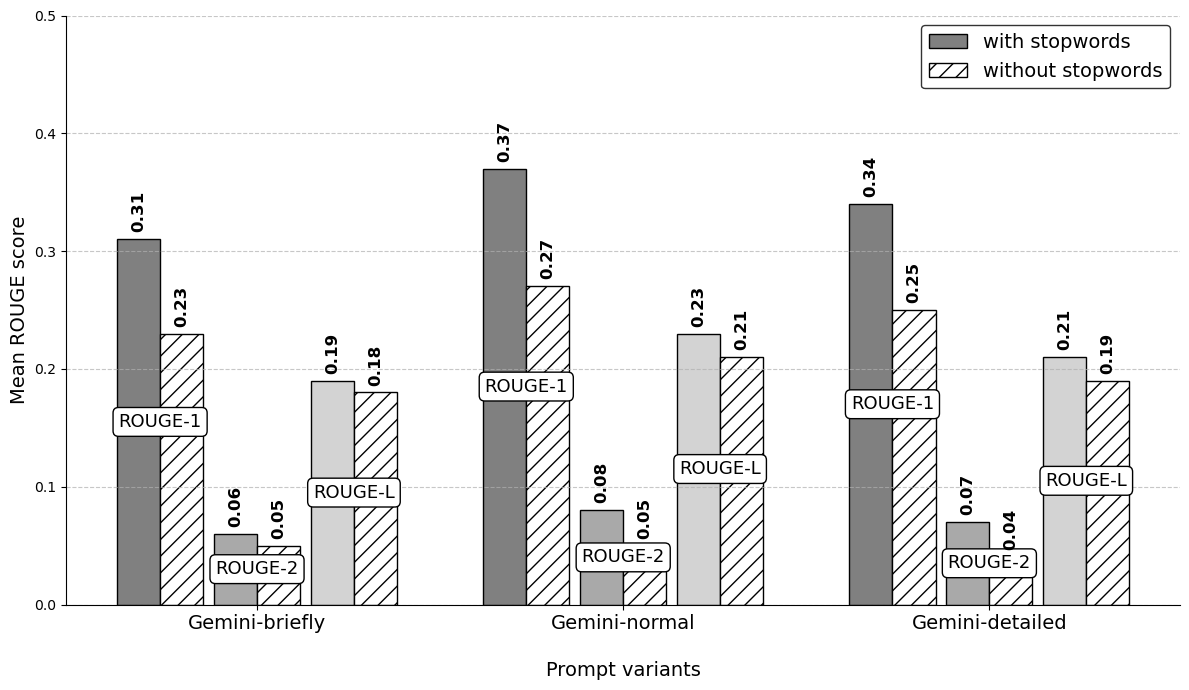

In [3]:
with_stopwords = [
    [0.31, 0.06, 0.19],  # gemini-briefly
    [0.37, 0.08, 0.23],  # gemini-normal
    [0.34, 0.07, 0.21],  # gemini-detailed
]

without_stopwords = [
    [0.23, 0.05, 0.18],  # gemini-briefly
    [0.27, 0.05, 0.21],  # gemini-normal
    [0.25, 0.04, 0.19],  # gemini-detailed
]

prompts = ["Gemini-briefly", "Gemini-normal", "Gemini-detailed"]  # Prompt-Varianten
metrics = ["ROUGE-1", "ROUGE-2", "ROUGE-L"]  # ROUGE-Kategorien

# Parameter für die Balken
width = 0.2  # Breite der Balken
spacing_within_prompt = 0.25  # Abstand zwischen ROUGE-1, ROUGE-2 und ROUGE-L
spacing_between_prompts = 0.6  # Abstand zwischen den Prompt-Gruppen

# X-Positionen berechnen
positions = []
current_position = 0
for _ in prompts:
    for _ in metrics:
        positions.append(current_position)
        current_position += spacing_within_prompt + width
    current_position += spacing_between_prompts - spacing_within_prompt

# Plot erstellen
fig, ax = plt.subplots(figsize=(12, 7))

# Farben für die Balken
colors = ["grey", "darkgrey", "lightgrey"]

# Balken für jede Metrik hinzufügen
for i, metric in enumerate(metrics):
    # Mit Stopwords
    ax.bar(
        [positions[j * len(metrics) + i] for j in range(len(prompts))],
        [row[i] for row in with_stopwords],
        width,
        label="with stopwords" if i == 0 else None,
        color=colors[i],
        edgecolor="black",
    )
    # Ohne Stopwords
    ax.bar(
        [positions[j * len(metrics) + i] + width for j in range(len(prompts))],
        [row[i] for row in without_stopwords],
        width,
        label="without stopwords" if i == 0 else None,
        color="white",
        edgecolor="black",
        hatch="//",
    )

    # Text in der Mitte der Balkenpaare (weiße Box mit Text)
    for j, prompt in enumerate(prompts):
        # X-Position in der Mitte zwischen den Balken
        mid_x = (positions[j * len(metrics) + i] + (positions[j * len(metrics) + i] + width)) / 2
        # Y-Position etwas über den kleineren der beiden Balken
        mid_y = max(with_stopwords[j][i], without_stopwords[j][i]) / 2
        ax.text(
            mid_x,
            mid_y,
            metric,
            ha="center",
            va="center",
            fontsize=13,
            bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.3"),
        )

# Beschriftungen und Titel
ax.set_xlabel("Prompt variants", fontsize=14, labelpad=20)  # Größerer Text und mehr Abstand
ax.set_ylabel("Mean ROUGE score", fontsize=14)
#ax.set_title("ROUGE mean scores for Gemini prompts with and without stopwords", fontsize=20)

# X-Ticks und Labels anpassen
tick_positions = [
    (positions[i * len(metrics)] + positions[i * len(metrics) + len(metrics) - 1] + width) / 2
    for i in range(len(prompts))
]
ax.set_xticks(tick_positions)
ax.set_xticklabels(prompts, fontsize=14)

# Legende ins Diagramm verschieben
ax.legend(fontsize=14, loc="upper right", frameon=True, edgecolor="black")

# Werte über den Balken anzeigen (fett und größer)
for i, metric in enumerate(metrics):
    for j, prompt in enumerate(prompts):
        # Mit Stopwords
        ax.annotate(
            f"{with_stopwords[j][i]:.2f}",
            xy=(positions[j * len(metrics) + i], with_stopwords[j][i]),
            xytext=(0, 5),
            textcoords="offset points",
            ha="center",
            va="bottom",
            rotation=90,  # Vertikale Ausrichtung
            fontsize=12,  # Größerer Text
            fontweight="bold",  # Fett
        )
        # Ohne Stopwords
        ax.annotate(
            f"{without_stopwords[j][i]:.2f}",
            xy=(positions[j * len(metrics) + i] + width, without_stopwords[j][i]),
            xytext=(0, 5),
            textcoords="offset points",
            ha="center",
            va="bottom",
            rotation=90,  # Vertikale Ausrichtung
            fontsize=12,  # Größerer Text
            fontweight="bold",  # Fett
        )

# Y-Achse anpassen
ax.set_ylim(0, 0.5)  # Maximalwert für die Y-Achse einstellen
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.1f}"))

# Wissenschaftliches Aussehen verbessern
ax.grid(axis="y", linestyle="--", alpha=0.7)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()
plt.show()

# BLEURT Metric

In [4]:
with_stopwords_gpt = [
    [0.593],  # gpt-briefly
    [0.584],  # gpt-normal
    [0.582],  # gpt-detailed
]

with_stopwords_gemini = [
    [0.591],  # gemini-briefly
    [0.582],  # gemini-normal
    [0.577],  # gemini-detailed
]

without_stopwords_gpt = [
    [0.220],  # gpt-briefly
    [0.237],  # gpt-normal
    [0.235],  # gpt-detailed
]

without_stopwords_gemini = [
    [0.210],  # gemini-briefly
    [0.206],  # gemini-normal
    [0.237],  # gemini-detailed
]





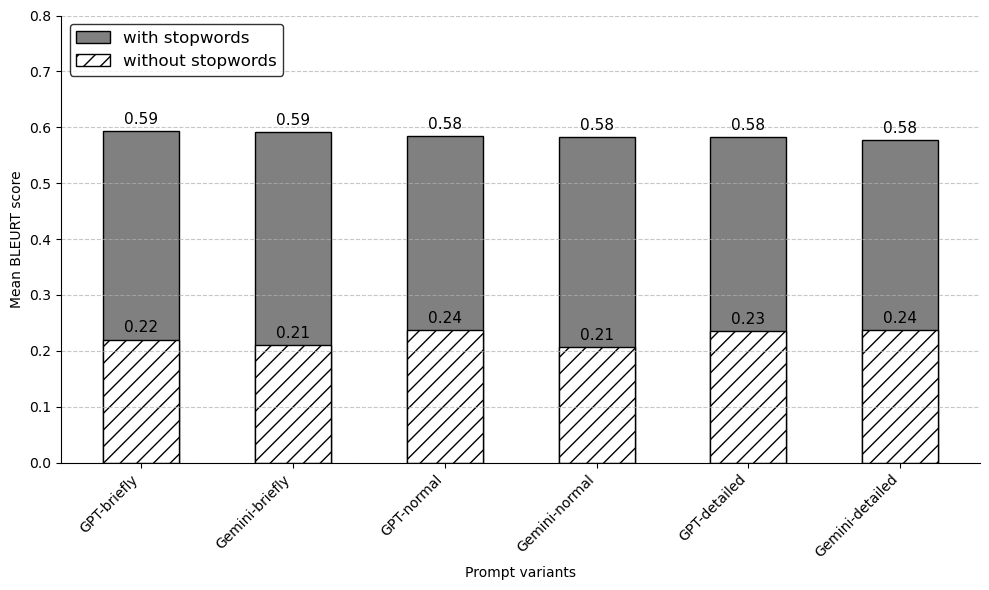

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Daten
categories = [
    "GPT-briefly",
    "Gemini-briefly",
    "GPT-normal",
    "Gemini-normal",
    "GPT-detailed",
    "Gemini-detailed"
]

with_stopwords = [
    0.593,  # gpt-briefly
    0.591,  # gemini-briefly
    0.584,  # gpt-normal
    0.582,  # gemini-normal
    0.582,  # gpt-detailed
    0.577   # gemini-detailed
]

without_stopwords = [
    0.220,  # gpt-briefly
    0.210,  # gemini-briefly
    0.237,  # gpt-normal
    0.206,  # gemini-normal
    0.235,  # gpt-detailed
    0.237   # gemini-detailed
]

# Anpassung der x-Positionen für engere Gruppierung
group_spacing = 0.3  # Abstand zwischen den Gruppen
bar_spacing = 0    # Abstand innerhalb einer Gruppe

x = np.array([i * group_spacing for i in range(len(categories))])  # Positionen für Gruppen
width = 0.15  # Schmalere Balkenbreite

# Plot erstellen
fig, ax = plt.subplots(figsize=(10, 6))  # Kleineres Diagramm

# Balken für "mit Stopwords" (grau)
bars1 = ax.bar(
    x - bar_spacing / 2,
    with_stopwords,
    width,
    label="with stopwords",
    color="grey",
    edgecolor="black"
)

# Balken für "ohne Stopwords" (weiß mit Schraffur)
bars2 = ax.bar(
    x + bar_spacing / 2,
    without_stopwords,
    width,
    label="without stopwords",
    color="white",
    edgecolor="black",
    hatch="//"
)

# Beschriftungen und Titel
ax.set_xlabel("Prompt variants", fontsize=10)
ax.set_ylabel("Mean BLEURT score", fontsize=10)
#ax.set_title("BLEURT mean score for prompts with and without stopwords", fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=45, ha="right", fontsize=10)

# Y-Achse Skala auf 0.7 begrenzen
ax.set_ylim(0, 0.8)

# Legende oben links platzieren und Schriftgröße anpassen
ax.legend(fontsize=12, loc="upper left", frameon=True, edgecolor="black")  # Größere Schrift und oben links positioniert

# Werte über den Balken anzeigen (zwei Nachkommastellen)
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(
            f"{height:.2f}",  # Zwei Nachkommastellen
            xy=(bar.get_x() + bar.get_width() / 2, height),
            xytext=(0, 3),
            textcoords="offset points",
            ha="center",
            va="bottom",
            fontsize=11,  # Kleinere Schriftgröße
        )

# Wissenschaftliches Aussehen verbessern
ax.grid(axis="y", linestyle="--", alpha=0.7)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()
plt.show() 